## Test 1

EasyGeppy is based on Geppy project (https://github.com/ShuhuaGao/geppy)

This example is based on the Geppy example: https://github.com/ShuhuaGao/geppy/blob/master/examples/sr/numerical_expression_inference-ENC.ipynb

In [13]:
import numpy as np
import pandas as pd
import plotly.express as px

from easy_geppy import EasyGeppy

## Synthetic dataset

In [14]:
def f(x):
    """ Ground truth function"""
    return -2 * x ** 2 + 11 * x + 13

### Generate samples

In [15]:
n_cases = 100
X = np.random.uniform(-10, 10, size=n_cases)   # random numbers in range [-10, 10)
Y = f(X) + (np.random.normal(size=n_cases)*10) # Gaussian noise

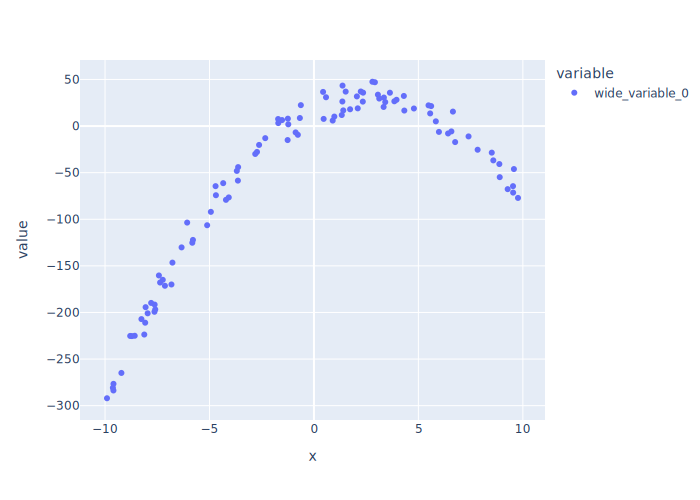

In [16]:
fig = px.scatter(x=X, y=[Y])
fig.show('svg')

### Increased noise observations

In [17]:
df = pd.DataFrame(X, columns=['x'])
df['y'] = Y
df['y1'] = Y+(np.random.normal(size=n_cases)*5)
df['y2'] = Y+(np.random.normal(size=n_cases)*10)
df['y3'] = Y+(np.random.normal(size=n_cases)*25)
df['y4'] = Y+(np.random.normal(size=n_cases)*50)
df

,x,y,y1,y2,y3,y4
0,0.976270,10.181266,8.411296,9.075859,-32.271380,48.751563
1,4.303787,32.304755,25.429998,42.506482,41.986767,83.776696
2,2.055268,31.816318,28.598226,24.895819,-24.572788,-13.621844
3,0.897664,5.900263,-5.216752,21.264034,-19.662408,-15.315618
4,-1.526904,6.423706,9.549863,9.287143,7.389470,49.553507
...,...,...,...,...,...,...
95,-6.336173,-130.176126,-132.130893,-125.237758,-105.316266,-148.369066
96,1.730259,18.011159,20.479868,24.444303,50.989581,-22.270167
97,-9.597849,-283.709251,-284.289771,-299.415485,-305.769722,-339.624848
98,6.578801,-5.749753,-15.903175,-7.818790,22.465099,-12.302453


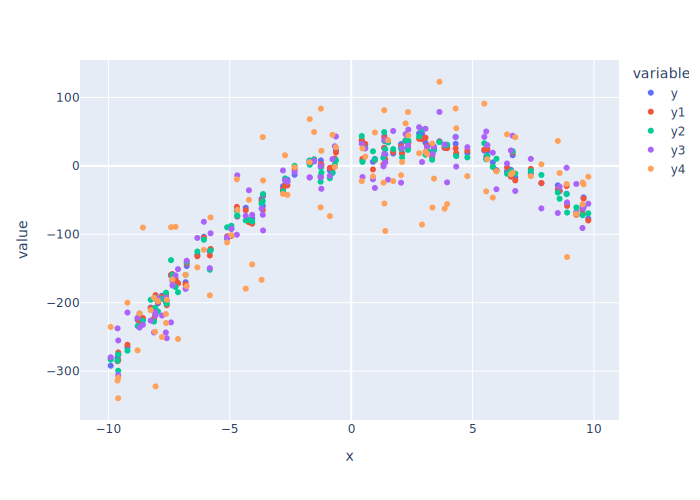

In [18]:
fig = px.scatter(df,x='x',y=['y','y1','y2','y3','y4'])
fig.show('svg')

## Define inputs and outputs

### Choose one output column

In [19]:
y_column = 'y4' # y4 is the most noisy so we're taking it

### You may choose many columns as input (remember to drop the y_column)

In [20]:
x_inputs = list(df.drop(y_column,axis=1).columns)
x_inputs

['x', 'y', 'y1', 'y2', 'y3']

### But we will use only the 'x' column from the dataset for this example

In [21]:
x_inputs = ['x']

## Create EasyGeppy instance and Initialize

In [22]:
egp = EasyGeppy(df,
                 x_columns=x_inputs,
                 y_column=y_column)

### Set default initialization

In [23]:
egp.default_initialization()

## Run evolution loop

In [24]:
egp.launch_evolution(n_pop=300, n_gen=100)

gen	nevals	size	avg       	std        	min     	max       
0  	100   	100 	3.5459e+11	2.51994e+12	0.176097	2.3373e+13
1  	99    	100 	2.98811e+06	1.94237e+07	0.176097	1.68588e+08
2  	99    	100 	4.72881e+11	4.70509e+12	0.176097	4.7288e+13 
3  	99    	100 	216909     	1.61813e+06	0.167102	1.48068e+07
4  	99    	100 	1.78667e+06	1.55112e+07	0.167102	1.54852e+08
5  	99    	100 	5.0436e+06 	5.01634e+07	0.167102	5.04163e+08
6  	99    	100 	2.14722e+07	2.0846e+08 	0.167102	2.09498e+09
7  	99    	100 	1.17483e+07	1.05095e+08	0.167102	1.05013e+09
8  	99    	100 	1.66995e+17	1.66158e+18	0.166705	1.66995e+19
9  	99    	100 	1.11213e+06	8.66128e+06	0.147325	8.24651e+07
10 	99    	100 	6.90401e+06	4.82256e+07	0.147325	3.69986e+08
11 	99    	100 	5.89232e+06	3.74535e+07	0.147325	3.30146e+08
12 	99    	100 	2.35376e+10	2.3407e+11 	0.147325	2.35251e+12
13 	99    	100 	5.30438e+06	3.71468e+07	0.147325	3.52624e+08
14 	99    	100 	1.51386e+06	9.39632e+06	0.147325	8.09563e+07
15 	99    	100 	6.83804e+06	

## Evolution Logs

### By default it presents statistics for the population MAPE (mean average percentage error) metric taken

In [25]:
egp.log[:5]

[{'gen': 0,
  'nevals': 100,
  'size': 100,
  'avg': 354590292289.404,
  'std': 2519941382231.2446,
  'min': 0.1760965275531892,
  'max': 23372955439898.55},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 2988112.003044997,
  'std': 19423668.133922677,
  'min': 0.1760965275531892,
  'max': 168587689.3233661},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 472880564853.9529,
  'std': 4705094286536.492,
  'min': 0.1760965275531892,
  'max': 47287977619891.64},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 216908.5168101153,
  'std': 1618134.6656576179,
  'min': 0.16710218250347056,
  'max': 14806765.303598922},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 1786665.6054783792,
  'std': 15511156.04960363,
  'min': 0.16710218250347056,
  'max': 154851907.68358684}]

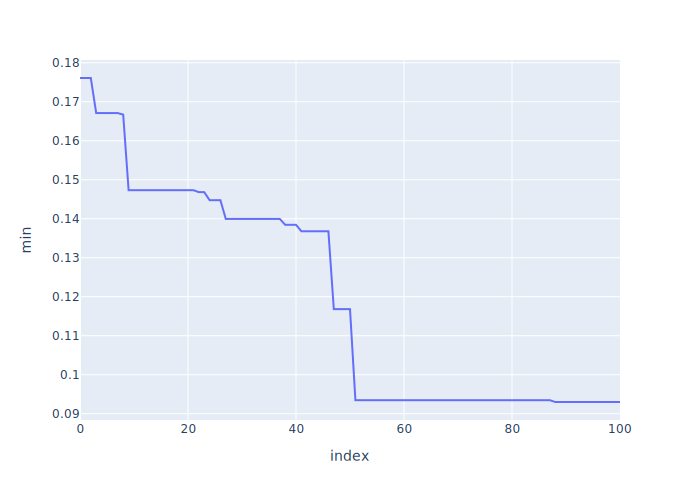

In [26]:
logs_df = pd.DataFrame(egp.log)
fig = px.line(logs_df,y='min')
fig.show('svg')

## Accessing Solutions

### Access an individual by index straight from the population array

In [27]:
egp.pop[1]

<class 'deap.creator.Individual'>[
	<class 'geppy.core.entity.Gene'> [protected_div, x, protected_div, protected_div, x, -79457.02780202436, sub, 133116.640575953, x, x, 622888.4105907781, 625793.452336912, x, 64017.54497285338, x],
	<class 'geppy.core.entity.Gene'> [add, x, protected_div, x, protected_div, -275599.8835968915, 541153.9700711672, x, 116113.18700379967, x, x, x, x, 55668.25737783789, x]
], linker=<built-in function add>

### Get an individual simplified/symbolic description according to its index on population array

In [28]:
# symbolic representation for the individual in the Nth position of population array
n = 0
egp.get_individual_simplified(n)

x*(1.25854191587887e-5*x**2 - 1.6753582144673*x + 10.9045501607737)

### Access best indivdual (solution) from population array

In [29]:
egp.best_individual

<class 'deap.creator.Individual'>[
	<class 'geppy.core.entity.Gene'> [protected_div, x, protected_div, protected_div, x, -79457.02780202436, sub, 133116.640575953, x, x, 622888.4105907781, 625793.452336912, x, x, -225992.06380014445],
	<class 'geppy.core.entity.Gene'> [protected_div, protected_div, protected_div, x, protected_div, -96992.885611396, sub, 133116.640575953, 380831.219190518, x, 369698.2889218754, 186534.40056593582, -18974.61979719944, -193065.43282901097, -447096.61388723855]
], linker=<built-in function add>

### Get best individual simplified/symbolic description

In [30]:
egp.get_best_solution_simplified()

x*(1.25854191587887e-5*x**2 - 1.6753582144673*x + 10.9045501607737)

## Making predictions

### Get the solution as a Python function (Geppy converts the individual to a lambda function)

In [31]:
best_func = egp.get_best_solution_as_function()
best_func

<function easy_geppy.easy_geppy.EasyGeppy.get_individual_solver_as_func.<locals>.solver(df)>

### Attaching predictions to dataframe

In [32]:
df['y_predicted'] = best_func(df)
df

,x,y,y1,y2,y3,y4,y_predicted
0,0.976270,10.181266,8.411296,9.075859,-32.271380,48.751563,9.049008
1,4.303787,32.304755,25.429998,42.506482,41.986767,83.776696,15.899903
2,2.055268,31.816318,28.598226,24.895819,-24.572788,-13.621844,15.334955
3,0.897664,5.900263,-5.216752,21.264034,-19.662408,-15.315618,8.438624
4,-1.526904,6.423706,9.549863,9.287143,7.389470,49.553507,-20.556236
...,...,...,...,...,...,...,...
95,-6.336173,-130.176126,-132.130893,-125.237758,-105.316266,-148.369066,-136.357064
96,1.730259,18.011159,20.479868,24.444303,50.989581,-22.270167,13.852079
97,-9.597849,-283.709251,-284.289771,-299.415485,-305.769722,-339.624848,-259.003186
98,6.578801,-5.749753,-15.903175,-7.818790,22.465099,-12.302453,-0.768093


### Checking sample

In [33]:
df.describe()

,x,y,y1,y2,y3,y4,y_predicted
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.544123,-58.148404,-58.904649,-58.935757,-60.337629,-62.857283,-62.130807
std,5.795080,95.544567,94.854336,95.618825,98.362354,107.109112,86.656928
min,-9.906090,-292.053461,-285.519114,-299.415485,-305.769722,-339.624848,-272.437649
25%,-5.883937,-122.929428,-123.787756,-124.119428,-104.670394,-135.906889,-122.185339
50%,-0.650380,-18.699368,-23.190327,-18.200942,-24.361546,-26.773391,-26.091407
75%,3.689665,18.222322,18.838560,14.274709,17.309239,15.927125,9.139867
max,9.767477,47.556523,41.168435,53.115961,78.765368,122.909075,17.733340


## Plotting results

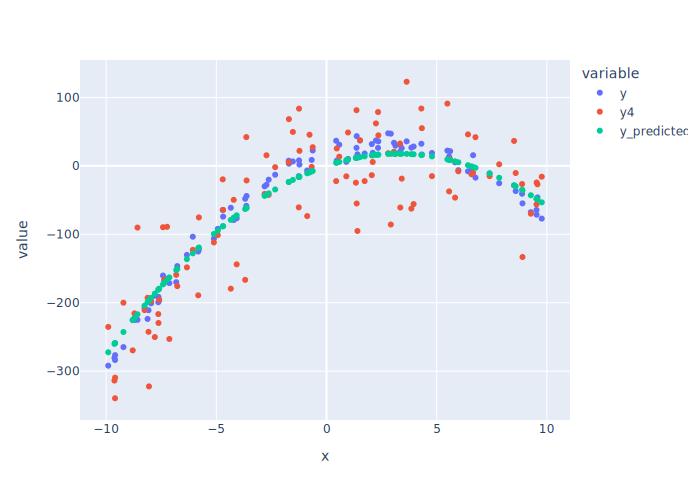

In [34]:
fig = px.scatter(df,x='x', y=['y',y_column,'y_predicted'])
fig.show('svg')

## Visualization: Expression Tree as a diagram

In [35]:
import geppy as gep

 # we want use symbol labels instead of words in the tree graph
rename_labels = {'add': '+', 'sub': '-', 'mul': '*', 'protected_div': '/'}  
gep.export_expression_tree(egp.best_individual, rename_labels, 'data/numerical_expression_tree.png')



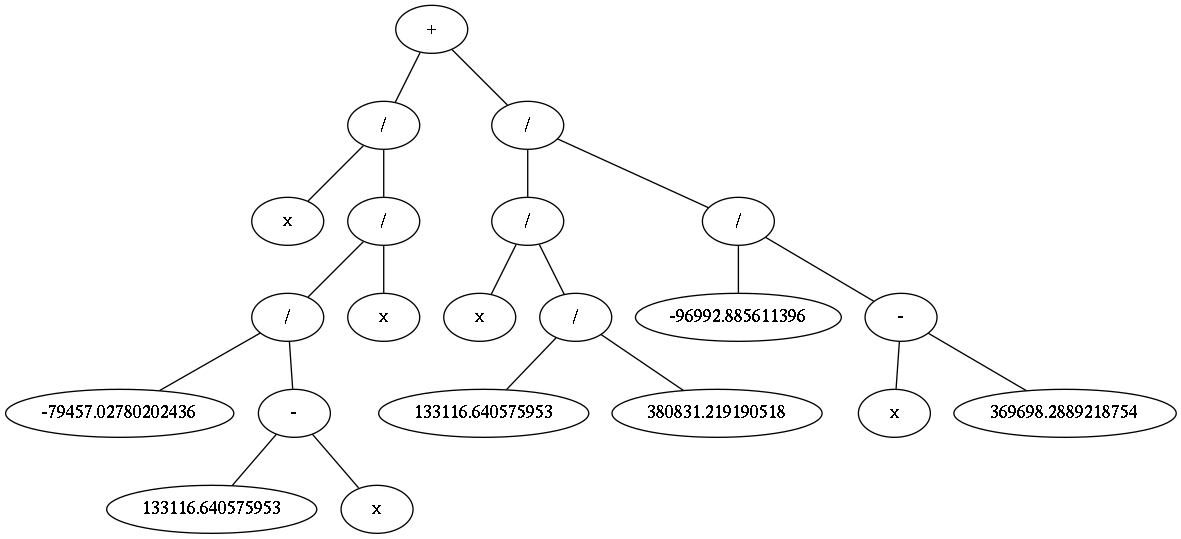

In [36]:
# show the above image here for convenience
from IPython.display import Image
Image(filename='data/numerical_expression_tree.png') 

## Train from a saved checkpoint

### As long as you have the previous SimpleGeppy object in memory
### you can start from where you stoped by calling launch_evolution again

In [37]:
egp.launch_evolution(n_pop=300, n_gen=100)

gen	nevals	size	avg    	std    	min      	max    
0  	0     	100 	885.259	7525.99	0.0929986	75678.5
1  	99    	100 	2.84312e+08	2.81345e+09	0.0929986	2.82774e+10
2  	99    	100 	353.469    	1929.84    	0.0929986	16800.7    
3  	99    	100 	1.97695e+06	1.19235e+07	0.0929986	9.63921e+07
4  	99    	100 	51455.6    	506938     	0.0929986	5.09528e+06
5  	99    	100 	1.5172e+11 	1.50899e+12	0.0929986	1.5166e+13 
6  	99    	100 	193.863    	878.901    	0.0929986	8306.92    
7  	99    	100 	188.848    	711.443    	0.0929986	4830.94    
8  	99    	100 	472828     	3.6798e+06 	0.0929986	3.61199e+07
9  	99    	100 	137.363    	479.237    	0.0929986	3338.19    
10 	99    	100 	199333     	1.98067e+06	0.0929986	1.99068e+07
11 	99    	100 	1.52646e+07	1.49421e+08	0.0929986	1.50178e+09
12 	99    	100 	4.1332e+06 	2.73727e+07	0.0929986	2.56805e+08
13 	99    	100 	1.82524e+06	1.63037e+07	0.0929986	1.62877e+08
14 	99    	100 	871597     	8.0818e+06 	0.0929986	8.10599e+07
15 	99    	100 	1.62836e+07	1.09

### The log variable gets restarted everytime you launch evolution

In [38]:
egp.log[:5]

[{'gen': 0,
  'nevals': 0,
  'size': 100,
  'avg': 885.258753855116,
  'std': 7525.986611505831,
  'min': 0.09299856233655115,
  'max': 75678.54185089855},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 284311601.8248579,
  'std': 2813450472.172585,
  'min': 0.09299856233655115,
  'max': 28277377463.63117},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 353.4689087740873,
  'std': 1929.8444882979068,
  'min': 0.09299856233655115,
  'max': 16800.7051047063},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 1976946.5498636134,
  'std': 11923515.647055244,
  'min': 0.09299856233655115,
  'max': 96392136.91754247},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 51455.59131703695,
  'std': 506937.9587867892,
  'min': 0.09299856233655115,
  'max': 5095283.793960608}]

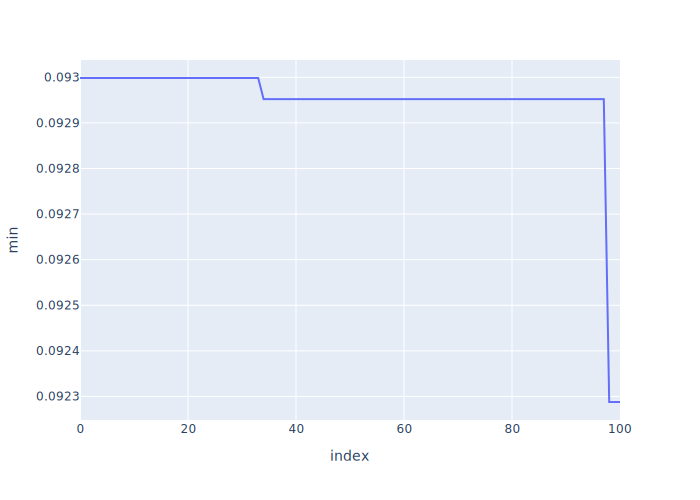

In [39]:
logs_df = pd.DataFrame(egp.log)
fig = px.line(logs_df,y='min')
fig.show('svg')

### But the logs variable keeps the story as a list of list for each execution

In [40]:
egp.logs[0][:5]

[{'gen': 0,
  'nevals': 100,
  'size': 100,
  'avg': 354590292289.404,
  'std': 2519941382231.2446,
  'min': 0.1760965275531892,
  'max': 23372955439898.55},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 2988112.003044997,
  'std': 19423668.133922677,
  'min': 0.1760965275531892,
  'max': 168587689.3233661},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 472880564853.9529,
  'std': 4705094286536.492,
  'min': 0.1760965275531892,
  'max': 47287977619891.64},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 216908.5168101153,
  'std': 1618134.6656576179,
  'min': 0.16710218250347056,
  'max': 14806765.303598922},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 1786665.6054783792,
  'std': 15511156.04960363,
  'min': 0.16710218250347056,
  'max': 154851907.68358684}]

In [41]:
egp.logs[1][:5]

[{'gen': 0,
  'nevals': 0,
  'size': 100,
  'avg': 885.258753855116,
  'std': 7525.986611505831,
  'min': 0.09299856233655115,
  'max': 75678.54185089855},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 284311601.8248579,
  'std': 2813450472.172585,
  'min': 0.09299856233655115,
  'max': 28277377463.63117},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 353.4689087740873,
  'std': 1929.8444882979068,
  'min': 0.09299856233655115,
  'max': 16800.7051047063},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 1976946.5498636134,
  'std': 11923515.647055244,
  'min': 0.09299856233655115,
  'max': 96392136.91754247},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 51455.59131703695,
  'std': 506937.9587867892,
  'min': 0.09299856233655115,
  'max': 5095283.793960608}]

### You must clean it by using clan_logs() function

In [42]:
egp.clean_logs()
egp.logs

[]

### Get and use new results

In [43]:
best_func = egp.get_best_solution_as_function()
best_func

<function easy_geppy.easy_geppy.EasyGeppy.get_individual_solver_as_func.<locals>.solver(df)>

In [44]:
df['y_predicted'] = best_func(df)
df

,x,y,y1,y2,y3,y4,y_predicted
0,0.976270,10.181266,8.411296,9.075859,-32.271380,48.751563,10.230705
1,4.303787,32.304755,25.429998,42.506482,41.986767,83.776696,20.966623
2,2.055268,31.816318,28.598226,24.895819,-24.572788,-13.621844,17.800661
3,0.897664,5.900263,-5.216752,21.264034,-19.662408,-15.315618,9.525873
4,-1.526904,6.423706,9.549863,9.287143,7.389470,49.553507,-22.442226
...,...,...,...,...,...,...,...
95,-6.336173,-130.176126,-132.130893,-125.237758,-105.316266,-148.369066,-144.481860
96,1.730259,18.011159,20.479868,24.444303,50.989581,-22.270167,15.933463
97,-9.597849,-283.709251,-284.289771,-299.415485,-305.769722,-339.624848,-271.613896
98,6.578801,-5.749753,-15.903175,-7.818790,22.465099,-12.302453,6.826776


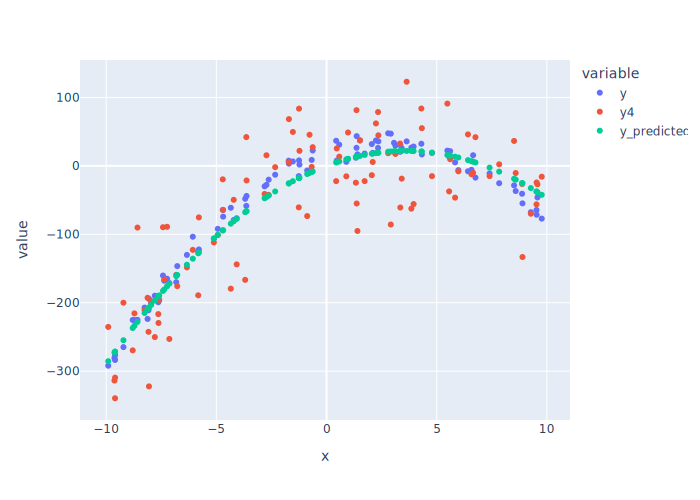

In [45]:
fig = px.scatter(df,x='x', y=['y',y_column,'y_predicted'])
fig.show('svg')

In [46]:
egp.get_best_solution_simplified()

x*(12.124642380509 - 1.68525388211635*x)